In [30]:
import math
import numpy as np
import pandas as pd
from datetime import date, timedelta
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import calendar
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


**Прогнозирование индекса потребительских цена на 2021 год**

In [31]:
# Чтение данных df_ref - исходные данные (нужны для построения отчетных графиков), df - данные для обучения. Ниже объяснение разницы
df_ref = pd.read_excel("Индекс потребительских цен_REF.xlsx")
df = pd.read_excel("Индекс потребительских цен_del.xlsx")


In [32]:
df.head()

,Date,Index_%
0,янв 2010,107.27
1,фев 2010,106.47
2,мар 2010,105.62
3,апр 2010,105.48
4,май 2010,105.80


In [33]:
# Преобразуем дату к удобному формату 
df['Date'] = df['Date'].str.replace('янв','1')
df['Date'] = df['Date'].str.replace('фев','2')
df['Date'] = df['Date'].str.replace('мар','3')
df['Date'] = df['Date'].str.replace('апр','4')
df['Date'] = df['Date'].str.replace('май','5')
df['Date'] = df['Date'].str.replace('июн','6')
df['Date'] = df['Date'].str.replace('июл','7')
df['Date'] = df['Date'].str.replace('авг','8')
df['Date'] = df['Date'].str.replace('сен','9')
df['Date'] = df['Date'].str.replace('окт','10')
df['Date'] = df['Date'].str.replace('ноя','11')
df['Date'] = df['Date'].str.replace('дек','12')

print(df.head())

     Date  Index_%
0  1 2010   107.27
1  2 2010   106.47
2  3 2010   105.62
3  4 2010   105.48
4  5 2010   105.80


In [34]:
df_ref['Date'] = df_ref['Date'].str.replace('янв','1')
df_ref['Date'] = df_ref['Date'].str.replace('фев','2')
df_ref['Date'] = df_ref['Date'].str.replace('мар','3')
df_ref['Date'] = df_ref['Date'].str.replace('апр','4')
df_ref['Date'] = df_ref['Date'].str.replace('май','5')
df_ref['Date'] = df_ref['Date'].str.replace('июн','6')
df_ref['Date'] = df_ref['Date'].str.replace('июл','7')
df_ref['Date'] = df_ref['Date'].str.replace('авг','8')
df_ref['Date'] = df_ref['Date'].str.replace('сен','9')
df_ref['Date'] = df_ref['Date'].str.replace('окт','10')
df_ref['Date'] = df_ref['Date'].str.replace('ноя','11')
df_ref['Date'] = df_ref['Date'].str.replace('дек','12')

In [35]:
# Изменим тип колонки с датами на Date и назначим эту колонку индексами
#df.Date = pd.to_datetime(df.Date, format = "%m %Y")
#df.set_index('Date', inplace = True) 
df = df.drop(['Date'], axis = 1)


df_ref.Date = pd.to_datetime(df_ref.Date, format = "%m %Y")
df_ref.set_index('Date', inplace = True) 

In [36]:
df.head()

,Index_%
0,107.27
1,106.47
2,105.62
3,105.48
4,105.80


In [37]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go


data = []

trace = go.Scatter(x = df_ref.index,y = df_ref['Index_%'] ,mode = 'lines',name = 'Index')
data.append(trace)
title = 'Индекс потребительских цен / к соответствующему месяцу предыдущего года'
layout = dict(title = title, xaxis_title="Год", yaxis_title="Индекс потребительских цен, %")
fig = dict(data = data, layout = layout)
iplot(fig, show_link=False)


**На графике наблюдается не стандартный всплеск за 2015-2016 г и в мае 2019 года.**
*Для более качественного прогноза лучше всего эти всплески удалить из данных (такие данные находятся в df) или же заменить на среднее. В данном примере заменим их на среднее, данные заранее подготовлены в таблице excel*


In [61]:
# Используем модель Хольта Винтерса на исходных данных
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = df[:-9]
test = df[-9:]

model=ExponentialSmoothing(train['Index_%'], trend='add').fit()
#print(model.fittedvalues)
train['H-W'] = model.fittedvalues

pred = model.forecast(len(test))
test['H-W'] = pred

c:\users\pok\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation

c:\users\pok\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\pok\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



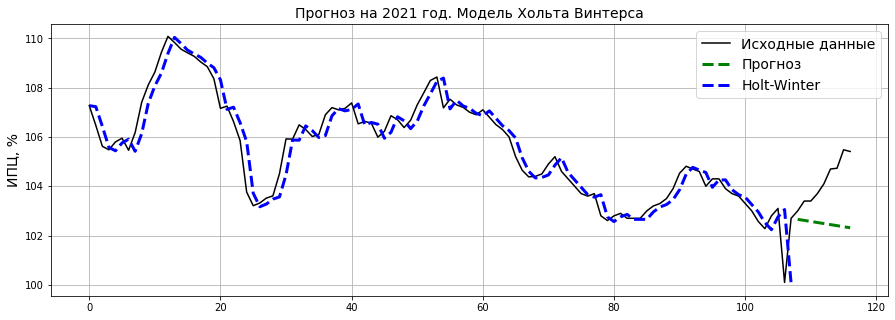

In [62]:
plt.figure(figsize=(15,5))
plt.title("Прогноз на 2021 год. Модель Хольта Винтерса", fontsize=14)
plt.plot(df['Index_%'], color='black', label='Исходные данные')
plt.plot(test['H-W'], linestyle ='--', color='green', label='Прогноз', linewidth=3)
plt.plot(train['H-W'], label= 'Holt-Winter', linestyle ='--', color='blue', linewidth=3)

plt.ylabel('ИПЦ, %',fontsize=14)
plt.legend(loc='best',fontsize=14)
plt.grid(True)

In [42]:
#Посчитаем точность модели
print(r2_score(test['Index_%'], test['H-W']))
print(mean_absolute_error(test['Index_%'], test['H-W']))
print(mean_squared_error(test['Index_%'], test['H-W']))

-4.327076146978041
1.7266847631839128
3.9135068965099276


**Построим авторгерессионную модель**

In [57]:
# AR модель
from statsmodels.tsa.ar_model import AR

model_ar = AR(train['Index_%']).fit()

y = model_ar.predict(start = len(train['Index_%']), end = len(train) + len(test))

train['AR'] = model_ar.fittedvalues
test['AR'] = y

c:\users\pok\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)


c:\users\pok\appdata\local

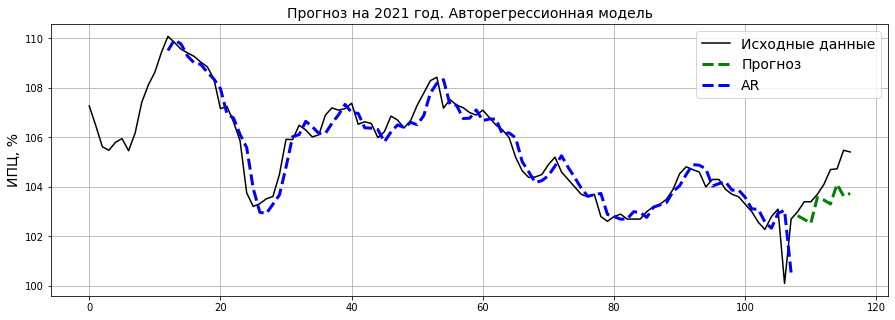

In [58]:
plt.figure(figsize=(15,5))
plt.title("Прогноз на 2021 год. Авторегрессионная модель", fontsize=14)
plt.plot(df['Index_%'], color='black', label='Исходные данные')
plt.plot(test['AR'], linestyle ='--', color='green', label='Прогноз', linewidth=3)
plt.plot(train['AR'], label= 'AR', linestyle ='--', color='blue', linewidth=3)

plt.ylabel('ИПЦ, %',fontsize=14)
plt.legend(loc='best',fontsize=14)
plt.grid(True)

In [59]:
print(r2_score(test['Index_%'], test['AR']))
print(mean_absolute_error(test['Index_%'], test['AR']))
print(mean_squared_error(test['Index_%'], test['AR']))

-0.5503347238634411
0.8939798804154546
1.1389447919155868


**Построим модель ARIMA или ARMA. Для начала проверим сезонность и найдем параметры модели**

adf:  -2.214550052439375
p-value:  0.20100707240753612
Critical values:  {'1%': -3.4808880719210005, '5%': -2.8836966192225284, '10%': -2.5785857598714417}
есть единичные корни, ряд не стационарен

Критерий Дики-Фуллера: p=0.201007


c:\users\pok\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



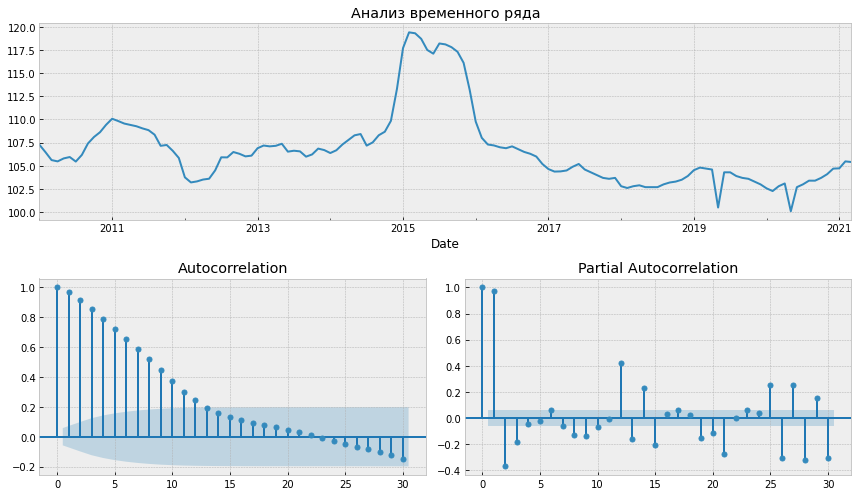

In [75]:
# Проверим ряд на стационарность и сезонность. Построим АКФ и ЧАКФ
def test_root (df):
    test = sm.tsa.adfuller(df)
    print ('adf: ', test[0]) 
    print ('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print('есть единичные корни, ряд не стационарен\n')
    else:
        print('единичных корней нет, ряд стационарен\n')
test_root(df)

# Отрисуем график. Количество лаг принято брать равное данных в году. У нас по месяцам. Значит, lags = 12    
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Анализ временного ряда')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

tsplot(df['Index_%'], lags=30)

c:\users\pok\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



Text(0.5, 0.98, 'Мультипликативная модель')

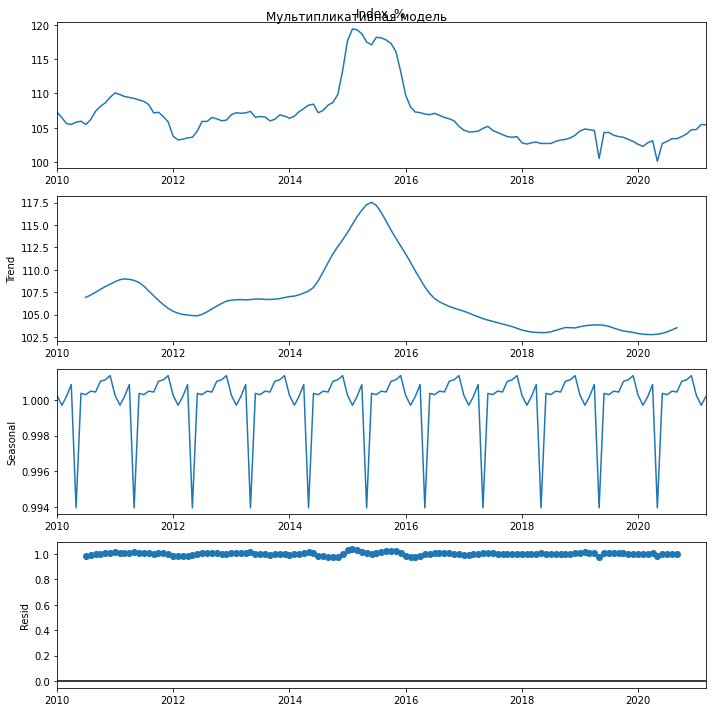

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_M = seasonal_decompose(df['Index_%'], model='multiplicative', freq=12)
plt.rcParams.update({'figure.figsize': (10,10)})
result_M.plot().suptitle('Мультипликативная модель')

In [10]:
#Возьмем первые разности, чтобы сделать ряд стационарным
diff_df = df.diff(periods = 1).dropna()

c:\users\pok\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



Критерий Дики-Фуллера: p=0.000000


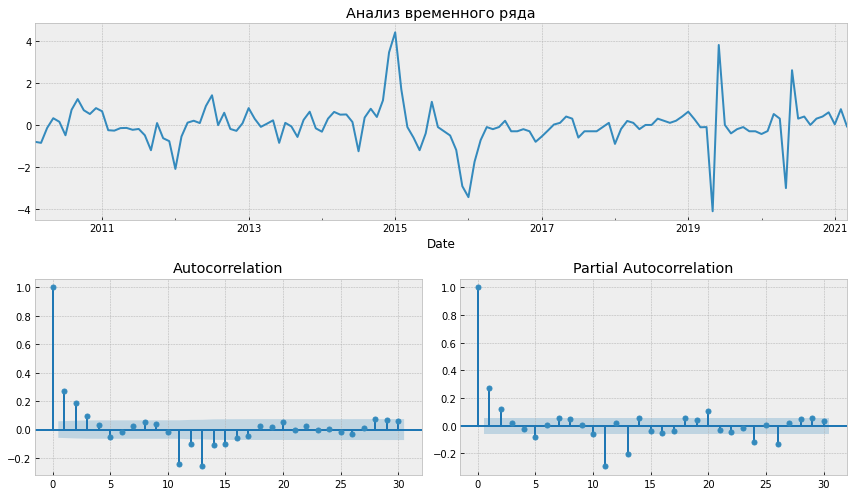

In [12]:
tsplot(diff_df['Index_%'], lags=30)

**Получилось, что ряд стационарен. Исходный ряд - интегрированный ряд первого порядка. Сезонность в ряде отсутствует, а оптимальные параметры (1, 0, 1)**

In [52]:
# По найденным параметрам построим модель ARIMA
from statsmodels.tsa.arima.model import ARIMA

train = df[:-9]
test = df[-9:]
model_arima =ARIMA(train, order=(1, 0, 1)).fit()
print(train)
y = model_arima.predict(start = len(train), end = len(train) + len(test) - 1)

train['ARIMA'] = model_arima.fittedvalues

test['ARIMA'] = y

     Index_%
0     107.27
1     106.47
2     105.62
3     105.48
4     105.80
..       ...
103   102.28
104   102.80
105   103.10
106   100.10
107   102.70

[108 rows x 1 columns]


c:\users\pok\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\pok\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



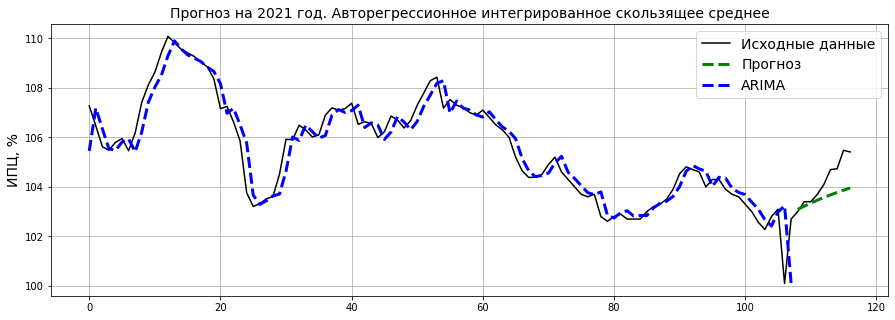

In [55]:
plt.figure(figsize=(15,5))
plt.title("Прогноз на 2021 год. Авторегрессионное интегрированное скользящее среднее", fontsize=14)
plt.plot(df['Index_%'], color='black', label='Исходные данные')
plt.plot(test['ARIMA'], linestyle ='--', color='green', label='Прогноз', linewidth=3)
plt.plot(train['ARIMA'], label= 'ARIMA', linestyle ='--', color='blue', linewidth=3)

plt.ylabel('ИПЦ, %',fontsize=14)
plt.legend(loc='best',fontsize=14)
plt.grid(True)

In [54]:
print(r2_score(test['Index_%'], test['ARIMA']))
print(mean_absolute_error(test['Index_%'], test['ARIMA']))
print(mean_squared_error(test['Index_%'], test['ARIMA']))

-0.06565339230678835
0.6812017600023492
0.7828763443615566


**Наилучший результат показала модель ARIMA. Её и будем использоваться для рпедсказания на 2021 год**

*Модель ARMA показала результат, хуже, чем ARIMA*

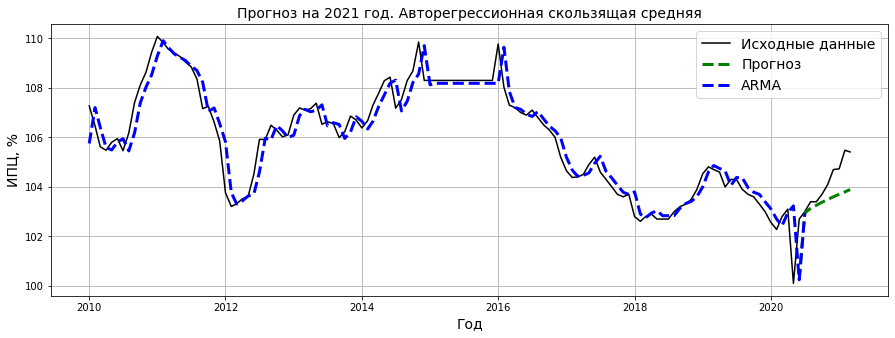

In [245]:
'''plt.figure(figsize=(15,5))
plt.title("Прогноз на 2021 год. Авторегрессионная скользящая средняя", fontsize=14)
plt.plot(df['Index_%'], color='black', label='Исходные данные')
plt.plot(test['ARMA'], linestyle ='--', color='green', label='Прогноз', linewidth=3)
plt.plot(train['ARMA'], label= 'ARMA', linestyle ='--', color='blue', linewidth=3)

plt.xlabel('Год', fontsize=14)
plt.ylabel('ИПЦ, %',fontsize=14)
plt.legend(loc='best',fontsize=14)
plt.grid(True)'''

In [242]:
print(r2_score(test['Index_%'], test['ARMA']))
print(mean_absolute_error(test['Index_%'], test['ARMA']))
print(mean_squared_error(test['Index_%'], test['ARMA']))

-2.525847575751037
1.4463263470006154
3.057953499058567


In [72]:
# Прогноз на 2021 год, используя оптимальную модель
train = df
test = pd.Series([4, 5, 6, 7, 8, 9, 10, 11, 12], index = ['2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'])

model_arima =ARIMA(train, order=(1, 0, 1)).fit()
y = model_arima.predict(start = len(train), end = len(train) + 8)

y.index = ['2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01','2021-09-01','2021-10-01','2021-11-01', '2021-12-01']
y.index = pd.to_datetime(y.index, format = "%Y-%m-%d")

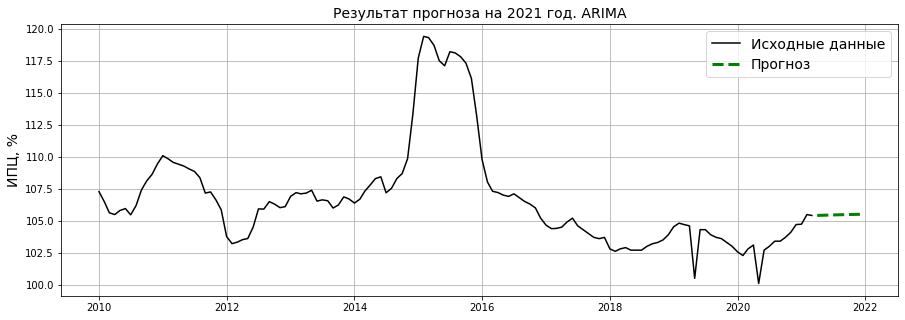

In [73]:
plt.figure(figsize=(15,5))
plt.title("Результат прогноза на 2021 год. ARIMA", fontsize=14)
plt.plot(df_ref['Index_%'], color='black', label='Исходные данные')
plt.plot(y, linestyle ='--', color='green', label='Прогноз', linewidth=3)

plt.ylabel('ИПЦ, %',fontsize=14)
plt.legend(loc='best',fontsize=14)
plt.grid(True)

In [74]:
print(y)

2021-04-01    105.411573
2021-05-01    105.425237
2021-06-01    105.438097
2021-07-01    105.450201
2021-08-01    105.461592
2021-09-01    105.472314
2021-10-01    105.482405
2021-11-01    105.491902
2021-12-01    105.500841
Name: predicted_mean, dtype: float64
